In [17]:
from datasets import load_dataset
import pandas as pd

In [18]:
labels = {
    0: "admiration",
    1: "amusement",
    2: "anger",
    3: "annoyance",
    4: "approval",
    5: "caring",
    6: "confusion",
    7: "curiosity",
    8: "desire",
    9: "disappointment",
    10: "disapproval",
    11: "disgust",
    12: "embarrassment",
    13: "excitement",
    14: "fear",
    15: "gratitude",
    16: "grief",
    17: "joy",
    18: "love",
    19: "nervousness",
    20: "optimism",
    21: "pride",
    22: "realization",
    23: "relief",
    24: "remorse",
    25: "sadness",
    26: "surprise",
    27: "neutral",
}
ru_labels = [
    "восхищение",
    "веселье",
    "злость",
    "раздражение",
    "одобрение",
    "забота",
    "непонимание",
    "любопытство",
    "желание",
    "разочарование",
    "неодобрение",
    "отвращение",
    "смущение",
    "возбуждение",
    "страх",
    "признательность",
    "горе",
    "радость",
    "любовь",
    "нервозность",
    "оптимизм",
    "гордость",
    "осознание",
    "облегчение",
    "раскаяние",
    "грусть",
    "удивление",
    "нейтральность",
]

In [19]:
dataset = load_dataset("seara/ru-go-emotions")

Using custom data configuration seara--ru-go-emotions-010f1c10233a04e9
Found cached dataset parquet (/home/seara/.cache/huggingface/datasets/seara___parquet/seara--ru-go-emotions-010f1c10233a04e9/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/3 [00:00<?, ?it/s]

In [20]:
dataset

DatasetDict({
    test: Dataset({
        features: ['text', 'labels', 'id', 'ru_text'],
        num_rows: 5427
    })
    train: Dataset({
        features: ['text', 'labels', 'id', 'ru_text'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id', 'ru_text'],
        num_rows: 5426
    })
})

In [23]:
df_train = pd.DataFrame(dataset["train"])
df_train.drop("id",axis=1).sample(1000).head(5)

,text,labels,ru_text
27095,Isn't that how [NAME] won in the first place?,[6],Разве не так [ИМЯ] выиграл в первую очередь?
8324,"When nobody can tell or force you to pay up, b...",[27],Когда никто не может сказать или заставить вас...
25612,I don’t think they are. Haksal was streaming K...,[27],Я так не думаю. Всего несколько дней назад Хак...
27573,You mean me? Said the same thing as you did lol,[27],"Ты имеешь ввиду меня? Сказал то же самое, что ..."
2660,What a little nugget!,[27],Какой маленький самородок!


In [24]:
df_train["Length words"] = df_train["ru_text"].apply(lambda x: len(x.split()))
df_train["Length"] = df_train["ru_text"].apply(len)

In [25]:
df_train["Length"].mean()

72.36956922368118

In [26]:
df_train["Length words"].mean()

11.747039852568532

<AxesSubplot: xlabel='Количество элементов', ylabel='Классы'>

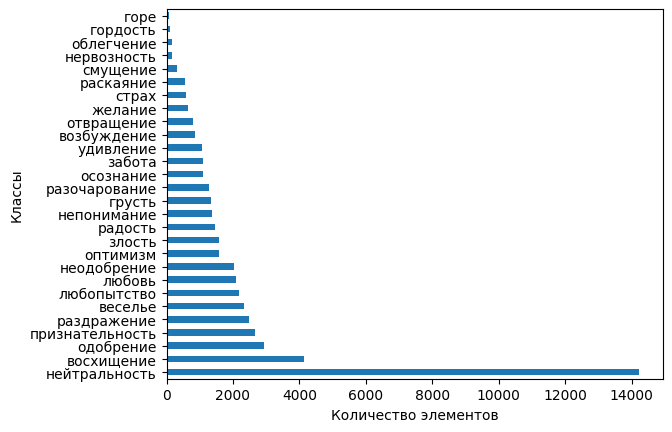

In [28]:
test = pd.Series([ru_labels[x] for item in df_train.labels for x in item]).value_counts()
test.plot.barh(xlabel="Количество элементов",ylabel="Классы")

In [21]:
dataset["train"].features

{'text': Value(dtype='string', id=None),
 'labels': Sequence(feature=ClassLabel(names=['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'], id=None), length=-1, id=None),
 'id': Value(dtype='string', id=None),
 'ru_text': Value(dtype='string', id=None)}

In [37]:
df = []
for key, value in labels.items():
    df.append(df_train[df_train["labels"].isin([[key]])].sample(1).drop(["labels","id", "text"],axis=1).values[0][0])
df = pd.DataFrame(dict(zip(ru_labels,df)).items(),columns=["Эмоция","Пример"])

df


,Эмоция,Пример
0,восхищение,"Вау, это более чем увлекательно."
1,веселье,Ой ничего не могу сделать... нажми пройти так весело :) Еще не пройдены все 3 дорожки :)
2,злость,Оставь [ИМЯ] в покое.
3,раздражение,"Фу, этот комментарий должен умереть. Прелюбодеяние — самый трусливый вариант, который вы когда-либо могли выбрать."
4,одобрение,Я чувствую с ним...
5,забота,"Я молюсь, чтобы у вас хватило сил бороться за себя и отправиться в Северную Каролину."
6,непонимание,"Все звуки возможны, кроме ключа, я не вижу, как его пропустили при первом поиске."
7,любопытство,блокирует запуск [ИМЯ]? Очень плохо
8,желание,"Впервые за весь сезон я не в восторге от разговора [ИМЯ] после игры. Я бы хотел, чтобы он обратился к PP."
9,разочарование,"Подождите, он действительно сделал это? Кажется, это было бы безумно неуважительно по отношению к вам, товарищи мастера."
